Pergunta: Qual é o período entre nascimentos pós acasalamento até a sexagem?

Hipótese: O período entre nascimento a sexagem é de 19 a 21 dias como descrito na literatura.

Objetivo a ser atingido: Determinar parâmetros gerais (n° de animais nascidos, período para nascimento e sexagem) da criação animal no biotério do ICC, total e por linhagem, nos últimos 5 anos; 

In [1]:
#Importando bibliotecas necessárias para a análise.

import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns

#Paramentros para os gráficos
plt.rcParams.update({'font.size': 20}) #tamanho da fonte
plt.rcParams['xtick.labelsize'] = 18 #tamanho da fonte
plt.rcParams['ytick.labelsize'] = 18 #tamanho da fonte


In [2]:
#Filtros para trabalhar com os dados da minha dataframe original - pós acasalamento a sexagem

acas_sex = pd.read_csv('../../tabelas_test/est_est_log_2019-06-18.csv', index_col='id')  #importando a tabela que eu vou trabalhar
acas_sex = acas_sex[                                                                  #indicando filtros que não quero que seja apresentado
    (acas_sex['num_ani'] < 200) &
    (acas_sex['util'] == 'sex') &
    (acas_sex['ling'] != 'Test') &
    (acas_sex['num_ani'] != 666)
]
                   


#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Alterando formato da data

datas = ['date_hoje', 'date_nasc', 'data_inicio', 'date_acas', 'date_nasc_acas', 'date_sex']  #colunas com as datas

for d in datas:
    acas_sex[d] = pd.to_datetime(acas_sex[d], unit = 's')                                    #formatando as datas
    
acas_sex.head()

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
457,2014-10-30 12:06:36,Tania,S129WT,4,m,2014-10-21 12:43:17,374,sex,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,666,666,AAA,AAA
458,2014-10-30 12:06:36,Tania,S129WT,4,m,2014-10-21 12:43:17,374,sex,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,2014-10-30 12:06:36,4,666,666,666,AAA,AAA
459,2014-10-30 12:06:36,Tania,S129WT,2,f,2014-10-21 12:43:17,458,sex,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,666,666,AAA,AAA
460,2014-10-30 12:06:36,Tania,S129WT,2,f,2014-10-21 12:43:17,458,sex,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,2014-10-30 12:06:36,666,2,666,666,AAA,AAA
462,2014-10-30 12:34:35,Tania,Swiss E,3,f,2014-10-06 18:11:54,454,sex,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,666,666,AAA,I


In [3]:
#Retirando os outliers do 'nume_ani' do meu DataFrame  

q1 = acas_sex['num_ani'].quantile(0.25)                               #filtro para a retirada dos valores discrepantes
q3 = acas_sex['num_ani'].quantile(0.75)
iqr = q3 - q1

acas_sex_sout = acas_sex[(acas_sex['num_ani'] > (q1 - 1.5 * iqr)) & (acas_sex['num_ani'] < (q3 + 1.5 * iqr))] #dataframe sem outliers
acas_sex_sout.head()

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
457,2014-10-30 12:06:36,Tania,S129WT,4,m,2014-10-21 12:43:17,374,sex,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,666,666,AAA,AAA
458,2014-10-30 12:06:36,Tania,S129WT,4,m,2014-10-21 12:43:17,374,sex,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,2014-10-30 12:06:36,4,666,666,666,AAA,AAA
459,2014-10-30 12:06:36,Tania,S129WT,2,f,2014-10-21 12:43:17,458,sex,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,666,666,AAA,AAA
460,2014-10-30 12:06:36,Tania,S129WT,2,f,2014-10-21 12:43:17,458,sex,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,2014-10-30 12:06:36,666,2,666,666,AAA,AAA
462,2014-10-30 12:34:35,Tania,Swiss E,3,f,2014-10-06 18:11:54,454,sex,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,666,666,AAA,I


In [4]:
#Substituindo linhagens  - ' S129WT', 'S129WT'] PARA '129/SV-E'

acas_sex_sout['ling'].replace([' S129WT', 'S129WT'], '129/SV-E', inplace=True)

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''

#Substituindo linhagens  - ' S129KO'  PARA 'S129KO'

acas_sex_sout['ling'].replace(' S129KO', 'S129KO', inplace=True)

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'C57BL06WT'  PARA 'C57BL/6'

acas_sex_sout['ling'].replace(['C57BL06WT','C57BL06WT\t'], 'C57BL/6', inplace=True)

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss A' PARA 'Swiss-1 A'

acas_sex_sout['ling'].replace(['Swiss A','Swiss/CFW', 'Swiss/CFW A'], 'Swiss-1 A', inplace=True)

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss B' PARA 'Swiss-1 B'

acas_sex_sout['ling'].replace(['Swiss B','Swiss/CFW B'], 'Swiss-1 B', inplace=True)

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss C' PARA 'Swiss-1 C'

acas_sex_sout['ling'].replace(['Swiss C','Swiss/CFW C'], 'Swiss-1 C', inplace=True)

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss D' PARA 'Swiss-1 D'

acas_sex_sout['ling'].replace(['Swiss D','Swiss/CFW D'], 'Swiss-1 D', inplace=True)

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss E' PARA 'Swiss-1 E'

acas_sex_sout['ling'].replace('Swiss E', 'Swiss-1 E', inplace=True)
'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss-2 A' PARA 'Swiss-2 A'

acas_sex_sout['ling'].replace('Balb/c', 'BALB/c', inplace=True)


/home/eloiza/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [5]:
acas_sex_sout['ling'].value_counts() #verificando se a função .replace() funcionou

BALB/c       1168
C57BL/6      1073
S129KO        564
129/SV-E      368
C3H           272
Swiss-1 A     164
Swiss-1 B     138
Swiss-1 D     118
Swiss-1 E     117
Swiss-1 C     115
Swiss-2 D     103
Swiss-2 C      87
Swiss-2 B      83
Swiss-2 E      77
Swiss-2 A      74
AG129          18
Name: ling, dtype: int64

In [6]:
blac = acas_sex_sout[acas_sex_sout['ling'] == 'C57BL/6']

In [7]:
t = blac.groupby('m_f')
t.sum()

,num_ani,id_solic,total_time,doses,data_solic,data_forn,data_fim,num_m,num_f,num_nasc,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim
m_f,,,,,,,,,,,,,,
f,1706,321012,321012,321012,321012,321012,321012,321012,321012,222948,321012,222974,321012,321012
m,2293,393606,393606,393606,393606,393606,393606,393606,393606,251271,251240,393606,393606,393606


In [8]:
#Criada um DataFrame com o período entre acasalamento e nascimento - com outliers (datas day_nasc_acas)
acas_sexa_periodo = pd.DataFrame()
acas_sexa_periodo = acas_sex_sout[['date_nasc_acas', 'date_sex', 'num_ani', 'ling']]
acas_sexa_periodo['day_acas_sex'] = list(map(lambda day_acas_sex: acas_sex_sout['date_sex'] - acas_sex_sout['date_nasc_acas'], acas_sex_sout))[0]
acas_sexa_periodo.head()

/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,date_nasc_acas,date_sex,num_ani,ling,day_acas_sex
id,,,,,
457,1970-01-01 00:11:06,1970-01-01 00:11:06,4,129/SV-E,0 days 00:00:00
458,1970-01-01 00:11:06,2014-10-30 12:06:36,4,129/SV-E,16373 days 11:55:30
459,1970-01-01 00:11:06,1970-01-01 00:11:06,2,129/SV-E,0 days 00:00:00
460,1970-01-01 00:11:06,2014-10-30 12:06:36,2,129/SV-E,16373 days 11:55:30
462,1970-01-01 00:11:06,1970-01-01 00:11:06,3,Swiss-1 E,0 days 00:00:00


In [9]:
#retirando os horários da coluna 'day_acas_sex_day'
p1 = lambda s: int(str(s).split(' ')[0])                    #Criada uma função única para transforar a serie em string, cortar por espaços na [0]
p2 = acas_sexa_periodo['day_acas_sex']                             #Chamando essa coluna na minha dataframe
l = list(map(p1, p2))                                       #Guardando essas informações numa lista/map para iteração e percorrer a serie de uma só vez
acas_sexa_periodo['day_acas_sex_day'] = l                 #Criando nova coluna com apenas o valor dos dias que vai receber o que tenho na minha lista          
acas_sexa_periodo.head()

/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,date_nasc_acas,date_sex,num_ani,ling,day_acas_sex,day_acas_sex_day
id,,,,,,
457,1970-01-01 00:11:06,1970-01-01 00:11:06,4,129/SV-E,0 days 00:00:00,0
458,1970-01-01 00:11:06,2014-10-30 12:06:36,4,129/SV-E,16373 days 11:55:30,16373
459,1970-01-01 00:11:06,1970-01-01 00:11:06,2,129/SV-E,0 days 00:00:00,0
460,1970-01-01 00:11:06,2014-10-30 12:06:36,2,129/SV-E,16373 days 11:55:30,16373
462,1970-01-01 00:11:06,1970-01-01 00:11:06,3,Swiss-1 E,0 days 00:00:00,0


In [10]:
#Retirando os outliers da coluna day_nasc_acas_day para verificar o período de acasalamento ao nascimento.
q1 = acas_sexa_periodo['day_acas_sex'].quantile(0.25) #filtro para a retirada dos valores discrepantes
q3 = acas_sexa_periodo['day_acas_sex'].quantile(0.75)
iqr = q3 - q1

acas_sexa_periodo_sout = acas_sexa_periodo[(acas_sexa_periodo['day_acas_sex'] > (q1 - 1.5 * iqr)) & (acas_sexa_periodo['day_acas_sex'] < (q3 + 1.5 * iqr))]#dataframe
acas_sexa_periodo_sout.head()

,date_nasc_acas,date_sex,num_ani,ling,day_acas_sex,day_acas_sex_day
id,,,,,,
457,1970-01-01 00:11:06,1970-01-01 00:11:06,4,129/SV-E,0 days,0
459,1970-01-01 00:11:06,1970-01-01 00:11:06,2,129/SV-E,0 days,0
462,1970-01-01 00:11:06,1970-01-01 00:11:06,3,Swiss-1 E,0 days,0
464,1970-01-01 00:11:06,1970-01-01 00:11:06,3,Swiss-1 E,0 days,0
466,1970-01-01 00:11:06,1970-01-01 00:11:06,3,Swiss-1 E,0 days,0


In [11]:
#precisei retirar os valores '0' pois estavam atrapalhando/influenciado a média e mediana dos dias
acas_sexa_periodo_sout = acas_sexa_periodo_sout[acas_sexa_periodo_sout['day_acas_sex_day'] != 0]
acas_sexa_periodo_sout.head()

,date_nasc_acas,date_sex,num_ani,ling,day_acas_sex,day_acas_sex_day
id,,,,,,
686,2014-12-03 12:36:36,2014-12-23 15:28:52,4,129/SV-E,20 days 02:52:16,20
750,2014-12-23 15:34:35,2015-01-07 16:32:25,4,129/SV-E,15 days 00:57:50,15
754,2014-12-23 15:34:34,2015-01-07 16:33:52,3,129/SV-E,15 days 00:59:18,15
786,2015-01-07 16:29:12,2015-01-28 11:16:06,5,Swiss-1 E,20 days 18:46:54,20
1023,2015-03-16 17:03:50,2015-03-18 16:54:01,3,C57BL/6,1 days 23:50:11,1


In [12]:
#Verificando se funcionou e se a média/mediana alteraram
g = acas_sexa_periodo_sout.groupby('ling')
g.median()

,num_ani,day_acas_sex_day
ling,,
129/SV-E,3.0,20.0
AG129,1.0,22.5
BALB/c,3.0,19.0
C3H,3.0,19.0
C57BL/6,4.0,21.0
S129KO,3.0,18.0
Swiss-1 A,4.0,19.0
Swiss-1 B,4.0,19.0
Swiss-1 C,4.0,19.0


In [13]:
#Calculando a mediana geral a partir de todas as medianas (por linhagem) e plotar no gráfico

mediana = acas_sexa_periodo_sout.groupby('ling')                      #Agrupando por linhagem e guardando em uma variável
mediana_sem_out = round(mediana['day_acas_sex_day'].median(),2)    #Somando o numero total de animas e pedidndo a mediana
plot_mediana = round(mediana_sem_out.median(),2)
plot_mediana

19.0

In [14]:
#Calculando a media geral a partir de todas as medianas (por linhagem) e plotar no gráfico

media = acas_sexa_periodo_sout.groupby('ling')
media_sem_out = round(media['day_acas_sex_day'].median(),2)
plot_media = round(media_sem_out.mean(),2)
plot_media

18.97

In [15]:
sns_plot_sex = acas_sexa_periodo_sout.groupby('ling').median().sort_values(by='day_acas_sex_day',ascending=False).reset_index()


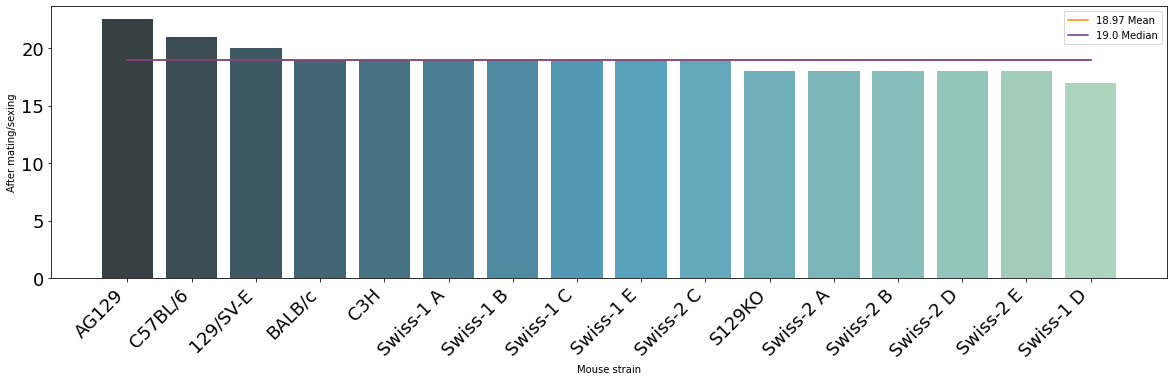

In [16]:
plt.figure(figsize=(20,5))
# plt.title('Median weaning period by strain of mice')

sns.barplot(x='ling',
    y='day_acas_sex_day', palette="GnBu_d",
    data=sns_plot_sex).set_xticklabels(
                            rotation=45,
                            horizontalalignment='right',
    labels=sns_plot_sex['ling']
)

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt.plot( #função para plotar o gráfico
    [0,15],
    [plot_media, plot_media], #faixa que marca a média 
    c='darkorange',
    label='18.97 Mean'
#      linestyle='--'
)
plt.plot( #função para plotar o gráfico
    [0,15],
    [plot_mediana, plot_mediana], #faixa que marca a mediana
    c='rebeccapurple',
    label='19.0 Median'
#     linestyle='--'
)

plt.legend(loc='upper right')
plt.xlabel('Mouse strain') #definindo nome do eixo X
plt.ylabel('After mating/sexing') #definindo nome do eixo Y
# #+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# #Salvando os gráficos
plt.savefig(
    fname="../../resultados/numero_media_nasc_sexa_fig5-ARTIGO.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=300, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

In [17]:
test_pallet = sns.color_palette('Greys_r',17)
test_pallet

[(0.06372933487120339, 0.06372933487120339, 0.06372933487120339),
 (0.12745866974240677, 0.12745866974240677, 0.12745866974240677),
 (0.2011534025374856, 0.2011534025374856, 0.2011534025374856),
 (0.2786620530565167, 0.2786620530565167, 0.2786620530565167),
 (0.35100346020761247, 0.35100346020761247, 0.35100346020761247),
 (0.40784313725490196, 0.40784313725490196, 0.40784313725490196),
 (0.4655132641291811, 0.4655132641291811, 0.4655132641291811),
 (0.5257977700884275, 0.5257977700884275, 0.5257977700884275),
 (0.5906343713956171, 0.5906343713956171, 0.5906343713956171),
 (0.6578085351787775, 0.6578085351787775, 0.6578085351787775),
 (0.7249826989619378, 0.7249826989619378, 0.7249826989619378),
 (0.7777777777777778, 0.7777777777777778, 0.7777777777777778),
 (0.826005382545175, 0.826005382545175, 0.826005382545175),
 (0.8729104190695886, 0.8729104190695886, 0.8729104190695886),
 (0.9125259515570934, 0.9125259515570934, 0.9125259515570934),
 (0.9483275663206459, 0.9483275663206459, 0.94

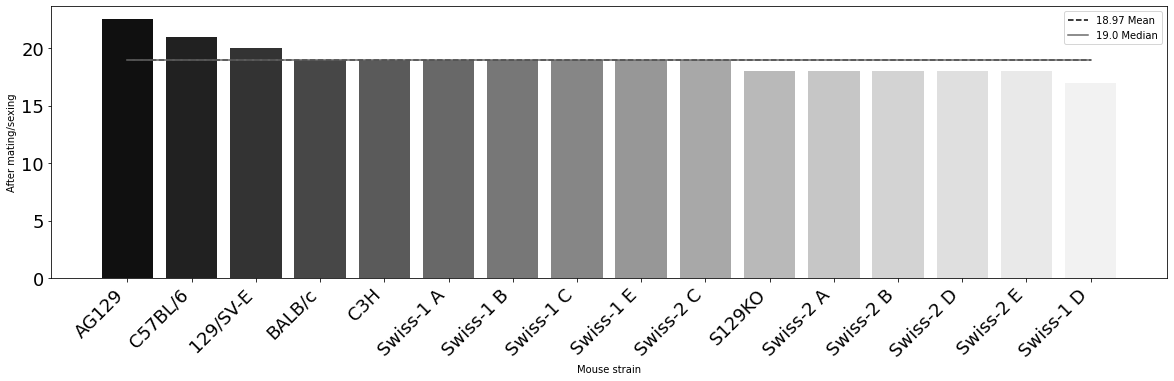

In [19]:
plt.figure(figsize=(20,5))
# plt.title('Median weaning period by strain of mice')

sns.barplot(x='ling',
    y='day_acas_sex_day', palette=test_pallet,
    data=sns_plot_sex).set_xticklabels(
                            rotation=45,
                            horizontalalignment='right',
    labels=sns_plot_sex['ling']
)

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt.plot( #função para plotar o gráfico
    [0,15],
    [plot_media, plot_media], #faixa que marca a média 
    c='black',
    label='18.97 Mean',
      linestyle='--'
)
plt.plot( #função para plotar o gráfico
    [0,15],
    [plot_mediana, plot_mediana], #faixa que marca a mediana
    c='dimgray',
    label='19.0 Median'
#     linestyle='--'
)

plt.legend(loc='upper right')
plt.xlabel('Mouse strain') #definindo nome do eixo X
plt.ylabel('After mating/sexing') #definindo nome do eixo Y
# #+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# #Salvando os gráficos
plt.savefig(
    fname="../../resultados/numero_media_nasc_sexa_fig5-ILAR.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=300, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

In [57]:
# #Plotando gráfico do período entre o nascimento pós acasalamento a sexagem de animais.

# plt.figure(figsize=(10,5))
# plt.title('Median weaning period by strain of mice', **csfont)

# plot = acas_sexa_periodo_sout.groupby('ling')
# plot['day_acas_sex_day'].median().sort_values(ascending=True).plot(
# kind='barh'
# )
# #+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# #plotando faixas de média e mediana


# plt.plot( #função para plotar o gráfico
#     [plot_media, plot_media], #faixa que marca a média
#     [len(acas_sexa_periodo_sout.index), 0], 
#     c='red' #cor vermelha da faixa
# )
# plt.plot( #função para plotar o gráfico
#     [plot_mediana, plot_mediana], #faixa que marca a mediana
#     [len(acas_sexa_periodo_sout.index), 0], 
#     c='green' #cor verde da faixa
# )
# #++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# #Editando legendas do gráfico

# plt.legend([str(plot_media) + ' média ani/ling', str(plot_mediana) + ' mediana ani/ling'])

# plt.xlabel('after mating / sexing', **csfont) #definindo nome do eixo X
# plt.ylabel('Mouse Strain') #definindo nome do eixo Y
# #+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# #Salvando os gráficos
# plt.savefig(
#     fname="../../resultados/periodo_nasc_sex_fig5-ARTIGO.png", #pasta e nome do arquivo onde vai ser salvo
#     bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
#     dpi=150, #numero de pixels da imagem?
#     transparent=True #deixar o gráfico transparente
# )

R. Ao gerar o gráfico, nos retorna que entre todas as linhagens o período de nascimento a sexagem é de 19 dias, corraborando com o que já é descrito na literatura, Santos e colaboradores em 2002 demonstram que o período de sexagem se marca a partir do desmame dos filhotes que geralmente ocorre com 18 dias, sendo que em linhagens isogênicas o desmame pode se dar com 28 dias. No momento do desmame, os animais são sexados e separados. 